# Read data from output of the pentomino solver

In [ ]:
import os

os.system()

In [10]:
filename = "rect6x10_solving"

# Open the file as f.
# The function readlines() reads the file.
with open(filename + '.txt') as f:
    content = f.read().splitlines()

boards = []
board = []

for line in content[11:-2]:
    if not line:
        if len(board) > 0:
            boards.append(board)
        board = []
    if line:
        row = []
        for char in line:
            row.append(ord(char))
        board.append(row)
        
boards.append(board)

In [2]:
boards[:3]

[[[46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46]],
 [[84, 84, 84, 46, 46, 46],
  [46, 84, 46, 46, 46, 46],
  [46, 84, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46]],
 [[84, 84, 84, 79, 46, 46],
  [46, 84, 46, 79, 46, 46],
  [46, 84, 46, 79, 46, 46],
  [46, 46, 46, 79, 46, 46],
  [46, 46, 46, 79, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46],
  [46, 46, 46, 46, 46, 46]]]

In [3]:
len(boards)

1228

# Now map the character matrix to a pretty plot

<Figure size 1280x960 with 0 Axes>

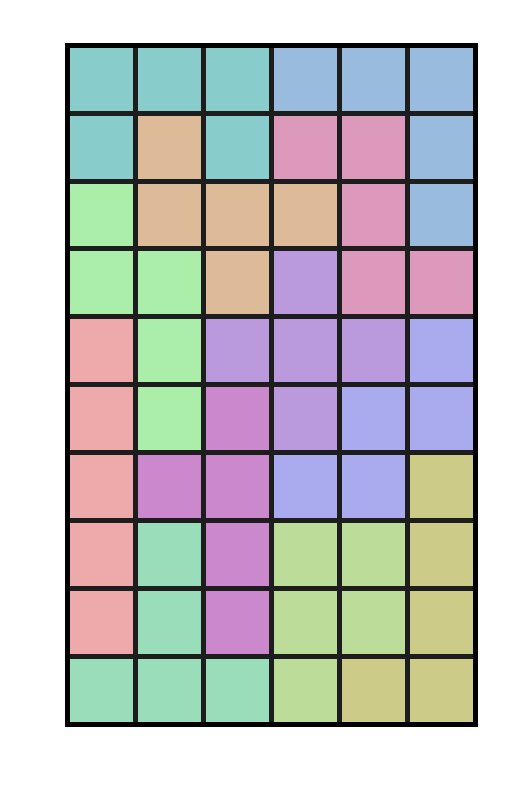

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=160)

from matplotlib import colors

#colors are handpicked from the pentomino wiki page
cmap = colors.ListedColormap(['#ffffff',
                              '#eeaaaa',
                                 '#bbdd99',
                                 '#cccc88',
                                 '#ddbb99',
                                 '#aaeeaa',
                                 '#99ddbb',
                                 '#88cccc',
                                 '#99bbdd',
                                 '#aaaaee',
                                 '#bb99dd',
                                 '#cc88cc',
                                 '#dd99bb'])

bounds=[46,79,80,81,82,83,84,85,86,87,88,89,90,91]
norm = colors.BoundaryNorm(bounds, cmap.N)

figure(figsize=(3,2), dpi=450)

plt.pcolormesh(board, cmap=cmap, norm=norm, edgecolors='#1d1d1d', linewidth=.5)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])


plt.show()

# Generate pretty plots for all the boards

In [5]:

i = 1

figure(figsize=(3,2), dpi=450)

for board in boards:
    plt.pcolormesh(board, cmap=cmap, norm=norm, edgecolors='#1d1d1d', linewidth=.5)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    plt.savefig(f'pentominoani{i}.png')
    plt.clf()
    i += 1
    

<Figure size 1350x900 with 0 Axes>

# Generate an animation from the saved images

In [6]:
import imageio

with imageio.get_writer('ani.gif', mode='I', fps=40) as writer:
    for j in range(1, i):
        writer.append_data(imageio.imread(f'pentominoani{j}.png'))
        

In [7]:
from pygifsicle import optimize

optimize('ani.gif')

gifsicle: warning: huge GIF, conserving memory (processing may take a while)
gifsicle: warning: trivial adaptive palette (only 15 colors in source)


In [8]:
os.system(f'ffmpeg -i ani.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" {filename}.mp4')

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

0